#### 2019 DEATH DATA PREP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import nltk
import spacy
import textblob

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)

In [3]:
d1619 = pd.read_csv('Y:/DQSS/Death/MBG/py/capstone2/data/dth1619_raw.csv',
                  low_memory=False,
                  encoding = 'unicode_escape')

In [4]:
d1619.head()

,sfn,sex,ageyrs,dob,dod,dodm,dodd,dody,dcounty,dstateFIPS,bridgerace,hispno,marital,rcounty,rcntyfips,rstatefips,manner,tobac,dthyr,pg,UCOD,MC1,MC2,MC3,MC4,MC5,MC6,MC7,MC8,MC9,MC10,MC11,MC12,MC13,MC14,MC15,MC16,MC17,MC18,MC19,MC20,codAq,codBq,codCq,codDq,codIIq,AllMC,codlit
0,2017012363,F,71.0,04/15/1945,03/03/2017,3,3,2017,KING,WA,1,Y,D,KING,033,WA,N,U,2017,8.0,I110,I110,F019,I64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CEREBROVASCULAR ACCIDENT,DEMENTIA VASCULAR,CONGESTIVE HEART FAILURE,HYPERTENSIVE HEART DISEASE,NaN,I110 F019 I64,CEREBROVASCULAR ACCIDENT DEMENTIA VASCULAR CON...
1,2017019356,M,98.0,05/03/1918,04/24/2017,4,24,2017,LEWIS,WA,1,Y,W,LEWIS,041,WA,N,N,2017,8.0,I516,I516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CARDIOVASCULAR DISEASE,NaN,NaN,NaN,NaN,I516,CARDIOVASCULAR DISEASE
2,2017019357,F,90.0,12/27/1926,04/24/2017,4,24,2017,LEWIS,WA,1,Y,W,LEWIS,041,WA,N,P,2017,8.0,G419,G419,F179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STATUS EPILEPTICUS,NaN,NaN,NaN,NaN,G419 F179,STATUS EPILEPTICUS
3,2017019358,M,89.0,09/22/1927,04/23/2017,4,23,2017,SNOHOMISH,WA,1,Y,M,SNOHOMISH,061,WA,A,U,2017,8.0,J441,J441,C61,I10,I250,R092,R263,S324,W18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESPIRATORY ARREST,CHRONIC OBSTRUCTIVE PULMONARY DISEASE EXACERBA...,NaN,NaN,LEFT ACETABULAR FRACTURE AND PROLONGED BED RES...,J441 C61 I10 I250 R092 R263 S324 W18,RESPIRATORY ARREST CHRONIC OBSTRUCTIVE PULMONA...
4,2017019359,F,90.0,09/29/1926,04/23/2017,4,23,2017,PIERCE,WA,1,Y,W,PIERCE,053,WA,N,P,2017,8.0,I509,I509,A310,F179,I120,I461,I48,J449,K922,Q600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SUDDEN CARDIAC DEATH, PROBABLE ARRHYTHMIA","ATRIAL FIBRILLATION, RECENT ONSET",CHRONIC DIASTOLIC HEART FAILURE,NaN,HYPERTENSION. CHRONIC RENAL INSUFFICIENCY (SOL...,I509 A310 F179 I120 I461 I48 J449 K922 Q600 ...,"SUDDEN CARDIAC DEATH, PROBABLE ARRHYTHMIA ATRI..."


**Keep relevant variables** including underlying cause code ('UCOD'), all multiple cause ICD-10 code fields ('MC1' to 'MC20'), all cause of death literal fields, and the 'tobacco' variable that indicates whether the medical certifier believed that tobacco use contributed to the decedent's death. The working data set will contain death records for deaths occurring in Washington State regardless of the decedents' residence states.

In [4]:
ds = d1619.loc[d1619['dstateFIPS']=='WA', ['sex', 'ageyrs', 'dob', 'dod', 'dody','dstateFIPS', 'marital','dcounty',
                                           'rcounty','rstatefips', 'UCOD','AllMC', 'codlit', 'pg', 'manner', 'tobac']]

In [5]:
ds['dod'] = pd.to_datetime(ds['dod'],
                            format = '%m/%d/%Y')

In [6]:
ds.dstateFIPS.value_counts()

WA    226987
Name: dstateFIPS, dtype: int64

I start with 226,987 death records for individuals who died in Washington State from 2016 through 2019.

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226987 entries, 0 to 226986
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   sex         226987 non-null  object        
 1   ageyrs      226987 non-null  float64       
 2   dob         226987 non-null  object        
 3   dod         226987 non-null  datetime64[ns]
 4   dody        226987 non-null  int64         
 5   dstateFIPS  226987 non-null  object        
 6   marital     226987 non-null  object        
 7   dcounty     226986 non-null  object        
 8   rcounty     226987 non-null  object        
 9   rstatefips  226987 non-null  object        
 10  UCOD        226841 non-null  object        
 11  AllMC       226987 non-null  object        
 12  codlit      226986 non-null  object        
 13  pg          166751 non-null  float64       
 14  manner      226945 non-null  object        
 15  tobac       226902 non-null  object        
dtypes:

**Create lists of ICD-10 codes for each of the 9 garbage code categories.** These lists will be used to flag records where underlying cause code (UCOD) is a member of a list. The nine categories of garbage codes are as follows:

- g1 = Septicemia
- g2 = Heart failure
- g3 = Ill-defined cancer
- g4 = Volume depletion
- g5 = Ill-defined
- g6 = Ill-defined cardiovascular
- g7 = Ill-defined injury
- g8 = Undetermined intent
- g9 = Ill-defined infectious

In [8]:
g1 = ['A40', 'A400', 'A401', 'A402', 'A403', 'A408', 'A409', 'A41', 'A410', 'A411', 'A412', 'A413', 'A414',
      'A415', 'A418', 'A419']

g2 = ['I50', 'I500', 'I501', 'I509']

g3 = ['C759', 'C76', 'C760', 'C761', 'C762', 'C763', 'C764', 'C765', 'C767', 'C768', 'C80', 'D099', 'D489']

g4 = ['E86', 'E87', 'E870', 'E871', 'E872', 'E873', 'E874', 'E875', 'E876', 'E877', 'E878' ]

g5 = ['I46', 'I460', 'I461', 'I469', 'P95', 'R00', 'R000', 'R001', 'R002', 'R008', 'R01', 'R010', 'R011', 
      'R012', 'R02', 'R03', 'R030', 'R031', 'R04', 'R040', 'R041', 'R042', 'R048', 'R049', 'R05', 'R06', 
      'R060', 'R061', 'R062', 'R063', 'R064', 'R065', 'R066', 'R067', 'R068', 'R07', 'R070', 'R071', 
      'R072', 'R073', 'R074', 'R09', 'R090', 'R091', 'R092', 'R093', 'R098', 'R10', 'R100', 'R101', 
      'R102', 'R103', 'R104', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R160', 'R161', 'R162', 'R17', 
      'R18', 'R19', 'R190', 'R191', 'R192', 'R193', 'R194', 'R195', 'R196', 'R198', 'R20', 'R200', 
      'R201', 'R202', 'R203', 'R208', 'R21', 'R22', 'R220', 'R221', 'R222', 'R223', 'R224', 'R227', 
      'R229', 'R23', 'R230', 'R231', 'R232', 'R233', 'R234', 'R238', 'R25', 'R250', 'R251', 'R252', 
      'R253', 'R258', 'R26', 'R260', 'R261', 'R262', 'R268', 'R27', 'R270', 'R278', 'R29', 'R290', 
      'R291', 'R292', 'R293', 'R294', 'R296', 'R298', 'R30', 'R300', 'R301', 'R309', 'R31', 'R32', 
      'R33', 'R34', 'R35', 'R36', 'R39', 'R390', 'R391', 'R392', 'R398', 'R40', 'R400', 'R401', 'R402', 
      'R41', 'R410', 'R411', 'R412', 'R413', 'R418', 'R42', 'R43', 'R430', 'R431', 'R432', 'R438', 'R44', 
      'R440', 'R441', 'R442', 'R443', 'R448', 'R45', 'R450', 'R451', 'R452', 'R453', 'R454', 'R455', 'R456', 
      'R457', 'R458', 'R46', 'R460', 'R461', 'R462', 'R463', 'R464', 'R465', 'R466', 'R467', 'R468', 'R47', 
      'R470', 'R471', 'R478', 'R48', 'R480', 'R481', 'R482', 'R488', 'R49', 'R490', 'R491', 'R492', 'R498', 
      'R50', 'R500', 'R501', 'R502', 'R508', 'R509', 'R51', 'R52', 'R520', 'R521', 'R522', 'R529', 'R53', 
      'R54', 'R55', 'R56', 'R560', 'R568', 'R57', 'R570', 'R571', 'R578', 'R579', 'R58', 'R59', 'R590', 
      'R591', 'R599', 'R60', 'R600', 'R601', 'R609', 'R61', 'R610', 'R611', 'R619', 'R62', 'R620', 'R628', 
      'R629', 'R63', 'R630', 'R631', 'R632', 'R633', 'R634', 'R635', 'R638', 'R64', 'R68', 'R680', 'R681', 
      'R682', 'R683', 'R688', 'R69', 'R70', 'R700', 'R701', 'R71', 'R72', 'R73', 'R730', 'R739', 'R74', 'R740',
      'R748', 'R749', 'R75', 'R76', 'R760', 'R761', 'R762', 'R768', 'R769', 'R77', 'R770', 'R771', 'R772', 'R778',
      'R779', 'R78', 'R780', 'R781', 'R782', 'R783', 'R784', 'R785', 'R786', 'R787', 'R788', 'R789', 'R79', 'R790',
      'R798', 'R799', 'R80', 'R81', 'R82', 'R820', 'R821', 'R822', 'R823', 'R824', 'R825', 'R826', 'R827', 'R828',
      'R829', 'R83', 'R830', 'R831', 'R832', 'R833', 'R834', 'R835', 'R836', 'R837', 'R838', 'R839', 'R84', 'R840',
      'R841', 'R842', 'R843', 'R844', 'R845', 'R846', 'R847', 'R848', 'R849', 'R85', 'R850', 'R851', 'R852',
      'R853', 'R854', 'R855', 'R856', 'R857', 'R858', 'R859', 'R86', 'R860', 'R861', 'R862', 'R863', 'R864',
      'R865', 'R866', 'R867', 'R868', 'R869', 'R87', 'R870', 'R871', 'R872', 'R873', 'R874', 'R875',
      'R876', 'R877', 'R878', 'R879', 'R89', 'R890', 'R891', 'R892', 'R893', 'R894', 'R895', 'R896', 'R897',
      'R898', 'R899', 'R90', 'R900', 'R908', 'R91', 'R92', 'R93', 'R930', 'R931', 'R932', 'R933', 'R934',
      'R935', 'R936', 'R937', 'R938', 'R94', 'R940', 'R941', 'R942', 'R943', 'R944', 'R945', 'R946', 'R947',
      'R948', 'R95', 'R96', 'R960', 'R961', 'R98', 'R99']

g6 = ['I10', 'I15', 'I150', 'I151', 'I152', 'I158', 'I159', 'I26', 'I260', 'I269', 'I49', 'I490', 'I491', 'I492',
      'I493', 'I494', 'I495', 'I498', 'I499', 'I51', 'I510', 'I511', 'I512', 'I513', 'I514', 'I515', 'I516', 'I517',
      'I518', 'I519', 'I70', 'I700', 'I701', 'I709', 'I74', 'I740', 'I741', 'I742', 'I743', 'I744', 'I745', 'I748',
      'I749', 'I99']

g7 = ['S00', 'S000', 'S001', 'S002', 'S003', 'S004', 'S005', 'S007', 'S008', 'S009', 'S01', 'S010', 'S011', 'S012',
      'S013', 'S014', 'S015', 'S017', 'S018', 'S019', 'S02', 'S020', 'S021', 'S022', 'S023', 'S024', 'S025', 'S026',
      'S027', 'S028', 'S029', 'S03', 'S030', 'S031', 'S032', 'S033', 'S034', 'S035', 'S04', 'S040', 'S041', 'S042',
      'S043', 'S044', 'S045', 'S046', 'S047', 'S048', 'S049', 'S05', 'S050', 'S051', 'S052', 'S053', 'S054', 'S055',
      'S056', 'S057', 'S058', 'S059', 'S06', 'S060', 'S061', 'S062', 'S063', 'S064', 'S065', 'S066', 'S067', 'S068',
      'S069', 'S07', 'S070', 'S071', 'S078', 'S079', 'S08', 'S080', 'S081', 'S088', 'S089', 'S09', 'S090', 'S091',
      'S092', 'S097', 'S098', 'S099', 'S10', 'S100', 'S101', 'S107', 'S108', 'S109', 'S11', 'S110', 'S111', 'S112',
      'S117', 'S118', 'S119', 'S12', 'S120', 'S121', 'S122', 'S127', 'S128', 'S129', 'S13', 'S130', 'S131', 'S132',
      'S133', 'S134', 'S135', 'S136', 'S14', 'S140', 'S141', 'S142', 'S143', 'S144', 'S145', 'S146', 'S15', 'S150',
      'S151', 'S152', 'S153', 'S157', 'S158', 'S159', 'S16', 'S17', 'S170', 'S178', 'S179', 'S18', 'S19', 'S197',
      'S198', 'S199', 'S20', 'S200', 'S201', 'S202', 'S203', 'S204', 'S207', 'S208', 'S21', 'S210', 'S211', 'S212',
      'S217', 'S218', 'S219', 'S22', 'S220', 'S221', 'S222', 'S223', 'S224', 'S225', 'S228', 'S229', 'S23', 'S230',
      'S231', 'S232', 'S233', 'S234', 'S235', 'S24', 'S240', 'S241', 'S242', 'S243', 'S244', 'S245', 'S246', 'S25',
      'S250', 'S251', 'S252', 'S253', 'S254', 'S255', 'S257', 'S258', 'S259', 'S26', 'S260', 'S268', 'S269', 'S27',
      'S270', 'S271', 'S272', 'S273', 'S274', 'S275', 'S276', 'S277', 'S278', 'S279', 'S28', 'S280', 'S281', 'S29',
      'S290', 'S297', 'S298', 'S299', 'S30', 'S300', 'S301', 'S302', 'S307', 'S308', 'S309', 'S31', 'S310', 'S311',
      'S312', 'S313', 'S314', 'S315', 'S317', 'S318', 'S32', 'S320', 'S321', 'S322', 'S323', 'S324', 'S325', 'S327',
      'S328', 'S33', 'S330', 'S331', 'S332', 'S333', 'S334', 'S335', 'S336', 'S337', 'S34', 'S340', 'S341', 'S342',
      'S343', 'S344', 'S345', 'S346', 'S348', 'S35', 'S350', 'S351', 'S352', 'S353', 'S354', 'S355', 'S357', 'S358',
      'S359', 'S36', 'S360', 'S361', 'S362', 'S363', 'S364', 'S365', 'S366', 'S367', 'S368', 'S369', 'S37', 'S370',
      'S371', 'S372', 'S373', 'S374', 'S375', 'S376', 'S377', 'S378', 'S379', 'S38', 'S380', 'S381', 'S382', 'S383',
      'S39', 'S390', 'S396', 'S397', 'S398', 'S399', 'S40', 'S400', 'S407', 'S408', 'S409', 'S41', 'S410', 'S411',
      'S417', 'S418', 'S42', 'S420', 'S421', 'S422', 'S423', 'S424', 'S427', 'S428', 'S429', 'S43', 'S430', 'S431',
      'S432', 'S433', 'S434', 'S435', 'S436', 'S437', 'S44', 'S440', 'S441', 'S442', 'S443', 'S444', 'S445', 'S447',
      'S448', 'S449', 'S45', 'S450', 'S451', 'S452', 'S453', 'S457', 'S458', 'S459', 'S46', 'S460', 'S461', 'S462',
      'S463', 'S467', 'S468', 'S469', 'S47', 'S48', 'S480', 'S481', 'S489', 'S49', 'S497', 'S498', 'S499', 'S50',
      'S500', 'S501', 'S507', 'S508', 'S509', 'S51', 'S510', 'S517', 'S518', 'S519', 'S52', 'S520', 'S521', 'S522',
      'S523', 'S524', 'S525', 'S526', 'S527', 'S528', 'S529', 'S53', 'S530', 'S531', 'S532', 'S533', 'S534', 'S54',
      'S540', 'S541', 'S542', 'S543', 'S547', 'S548', 'S549', 'S55', 'S550', 'S551', 'S552', 'S557', 'S558', 'S559',
      'S56', 'S560', 'S561', 'S562', 'S563', 'S564', 'S565', 'S567', 'S568', 'S57', 'S570', 'S578', 'S579', 'S58',
      'S580', 'S581', 'S589', 'S59', 'S597', 'S598', 'S599', 'S60', 'S600', 'S601', 'S602', 'S607', 'S608', 'S609',
      'S61', 'S610', 'S611', 'S617', 'S618', 'S619', 'S62', 'S620', 'S621', 'S622', 'S623', 'S624', 'S625', 'S626',
      'S627', 'S628', 'S63', 'S630', 'S631', 'S632', 'S633', 'S634', 'S635', 'S636', 'S637', 'S64', 'S640', 'S641',
      'S642', 'S643', 'S644', 'S647', 'S648', 'S649', 'S65', 'S650', 'S651', 'S652', 'S653', 'S654', 'S655', 'S657',
      'S658', 'S659', 'S66', 'S660', 'S661', 'S662', 'S663', 'S664', 'S665', 'S666', 'S667', 'S668', 'S669', 'S67',
      'S670', 'S678', 'S68', 'S680', 'S681', 'S682', 'S683', 'S684', 'S688', 'S689', 'S69', 'S697', 'S698', 'S699',
      'S70', 'S700', 'S701', 'S707', 'S708', 'S709', 'S71', 'S710', 'S711', 'S717', 'S718', 'S72', 'S720', 'S721',
      'S722', 'S723', 'S724', 'S727', 'S728', 'S729', 'S73', 'S730', 'S731', 'S74', 'S740', 'S741', 'S742', 'S747',
      'S748', 'S749', 'S75', 'S750', 'S751', 'S752', 'S757', 'S758', 'S759', 'S76', 'S760', 'S761', 'S762', 'S763',
      'S764', 'S767', 'S77', 'S770', 'S771', 'S772', 'S78', 'S780', 'S781', 'S789', 'S79', 'S797', 'S798', 'S799',
      'S80', 'S800', 'S801', 'S807', 'S808', 'S809', 'S81', 'S810', 'S817', 'S818', 'S819', 'S82', 'S820', 'S821',
      'S822', 'S823', 'S824', 'S825', 'S826', 'S827', 'S828', 'S829', 'S83', 'S830', 'S831', 'S832', 'S833', 'S834',
      'S835', 'S836', 'S837', 'S84', 'S840', 'S841', 'S842', 'S847', 'S848', 'S849', 'S85', 'S850', 'S851', 'S852',
      'S853', 'S854', 'S855', 'S857', 'S858', 'S859', 'S86', 'S860', 'S861', 'S862', 'S863', 'S867', 'S868', 'S869',
      'S87', 'S870', 'S878', 'S88', 'S880', 'S881', 'S889', 'S89', 'S897', 'S898', 'S899', 'S90', 'S900', 'S901',
      'S902', 'S903', 'S907', 'S908', 'S909', 'S91', 'S910', 'S911', 'S912', 'S913', 'S917', 'S92', 'S920', 'S921',
      'S922', 'S923', 'S924', 'S925', 'S927', 'S929', 'S93', 'S930', 'S931', 'S932', 'S933', 'S934', 'S935', 'S936',
      'S94', 'S940', 'S941', 'S942', 'S943', 'S947', 'S948', 'S949', 'S95', 'S950', 'S951', 'S952', 'S957', 'S958',
      'S959', 'S96', 'S960', 'S961', 'S962', 'S967', 'S968', 'S969', 'S97', 'S970', 'S971', 'S978', 'S98', 'S980',
      'S981', 'S982', 'S983', 'S984', 'S99', 'S997', 'S998', 'S999', 'T00', 'T000', 'T001', 'T002', 'T003', 'T006',
      'T008', 'T009', 'T01', 'T010', 'T011', 'T012', 'T013', 'T016', 'T018', 'T019', 'T02', 'T020', 'T021', 'T022',
      'T023', 'T024', 'T025', 'T026', 'T027', 'T028', 'T029', 'T03', 'T030', 'T031', 'T032', 'T033', 'T034', 'T038',
      'T039', 'T04', 'T040', 'T041', 'T042', 'T043', 'T044', 'T047', 'T048', 'T049', 'T05', 'T050', 'T051', 'T052',
      'T053', 'T054', 'T055', 'T056', 'T058', 'T059', 'T06', 'T060', 'T061', 'T062', 'T063', 'T064', 'T065', 'T068',
      'T07', 'T08', 'T09', 'T090', 'T091', 'T092', 'T093', 'T094', 'T095', 'T096', 'T098', 'T099', 'T10', 'T11',
      'T110', 'T111', 'T112', 'T113', 'T114', 'T115', 'T116', 'T118', 'T119', 'T12', 'T13', 'T130', 'T131', 'T132',
      'T133', 'T134', 'T135', 'T136', 'T138', 'T139', 'T14', 'T140', 'T141', 'T142', 'T143', 'T144', 'T145', 'T146',
      'T147', 'T148', 'T149', 'T15', 'T150', 'T151', 'T158', 'T159', 'T16', 'T17', 'T170', 'T171', 'T172', 'T173',
      'T174', 'T175', 'T178', 'T179', 'T18', 'T180', 'T181', 'T182', 'T183', 'T184', 'T185', 'T188', 'T189', 'T19',
      'T190', 'T191', 'T192', 'T193', 'T198', 'T199', 'T20', 'T200', 'T201', 'T202', 'T203', 'T204', 'T205', 'T206',
      'T207', 'T21', 'T210', 'T211', 'T212', 'T213', 'T214', 'T215', 'T216', 'T217', 'T22', 'T220', 'T221', 'T222',
      'T223', 'T224', 'T225', 'T226', 'T227', 'T23', 'T230', 'T231', 'T232', 'T233', 'T234', 'T235', 'T236', 'T237',
      'T24', 'T240', 'T241', 'T242', 'T243', 'T244', 'T245', 'T246', 'T247', 'T25', 'T250', 'T251', 'T252', 'T253',
      'T254', 'T255', 'T256', 'T257', 'T26', 'T260', 'T261', 'T262', 'T263', 'T264', 'T265', 'T266', 'T267', 'T268',
      'T269', 'T27', 'T270', 'T271', 'T272', 'T273', 'T274', 'T275', 'T276', 'T277', 'T28', 'T280', 'T281', 'T282',
      'T283', 'T284', 'T285', 'T286', 'T287', 'T288', 'T289', 'T29', 'T290', 'T291', 'T292', 'T293', 'T294', 'T295',
      'T296', 'T297', 'T30', 'T300', 'T301', 'T302', 'T303', 'T304', 'T305', 'T306', 'T307', 'T31', 'T310', 'T311',
      'T312', 'T313', 'T314', 'T315', 'T316', 'T317', 'T318', 'T319', 'T32', 'T320', 'T321', 'T322', 'T323', 'T324',
      'T325', 'T326', 'T327', 'T328', 'T329', 'T33', 'T330', 'T331', 'T332', 'T333', 'T334', 'T335', 'T336', 'T337',
      'T338', 'T339', 'T34', 'T340', 'T341', 'T342', 'T343', 'T344', 'T345', 'T346', 'T347', 'T348', 'T349', 'T35',
      'T350', 'T351', 'T352', 'T353', 'T354', 'T355', 'T356', 'T357', 'T36', 'T360', 'T361', 'T362', 'T363', 'T364',
      'T365', 'T366', 'T367', 'T368', 'T369', 'T37', 'T370', 'T371', 'T372', 'T373', 'T374', 'T375', 'T378', 'T379',
      'T38', 'T380', 'T381', 'T382', 'T383', 'T384', 'T385', 'T386', 'T387', 'T388', 'T389', 'T39', 'T390', 'T391',
      'T392', 'T393', 'T394', 'T398', 'T399', 'T40', 'T400', 'T401', 'T402', 'T403', 'T404', 'T405', 'T406', 'T407',
      'T408', 'T409', 'T41', 'T410', 'T411', 'T412', 'T413', 'T414', 'T415', 'T42', 'T420', 'T421', 'T422', 'T423',
      'T424', 'T425', 'T426', 'T427', 'T428', 'T43', 'T430', 'T431', 'T432', 'T433', 'T434', 'T435', 'T436', 'T438',
      'T439', 'T44', 'T440', 'T441', 'T442', 'T443', 'T444', 'T445', 'T446', 'T447', 'T448', 'T449', 'T45', 'T450',
      'T451', 'T452', 'T453', 'T454', 'T455', 'T456', 'T457', 'T458', 'T459', 'T46', 'T460', 'T461', 'T462', 'T463',
      'T464', 'T465', 'T466', 'T467', 'T468', 'T469', 'T47', 'T470', 'T471', 'T472', 'T473', 'T474', 'T475', 'T476',
      'T477', 'T478', 'T479', 'T48', 'T480', 'T481', 'T482', 'T483', 'T484', 'T485', 'T486', 'T487', 'T49', 'T490',
      'T491', 'T492', 'T493', 'T494', 'T495', 'T496', 'T497', 'T498', 'T499', 'T50', 'T500', 'T501', 'T502', 'T503',
      'T504', 'T505', 'T506', 'T507', 'T508', 'T509', 'T51', 'T510', 'T511', 'T512', 'T513', 'T518', 'T519', 'T52',
      'T520', 'T521', 'T522', 'T523', 'T524', 'T528', 'T529', 'T53', 'T530', 'T531', 'T532', 'T533', 'T534', 'T535',
      'T536', 'T537', 'T539', 'T54', 'T540', 'T541', 'T542', 'T543', 'T549', 'T55', 'T56', 'T560', 'T561', 'T562',
      'T563', 'T564', 'T565', 'T566', 'T567', 'T568', 'T569', 'T57', 'T570', 'T571', 'T572', 'T573', 'T578', 'T579',
      'T58', 'T59', 'T590', 'T591', 'T592', 'T593', 'T594', 'T595', 'T596', 'T597', 'T598', 'T599', 'T60', 'T600',
      'T601', 'T602', 'T603', 'T604', 'T608', 'T609', 'T61', 'T610', 'T611', 'T612', 'T618', 'T619', 'T62', 'T620',
      'T621', 'T622', 'T628', 'T629', 'T63', 'T630', 'T631', 'T632', 'T633', 'T634', 'T635', 'T636', 'T638', 'T639',
      'T64', 'T65', 'T650', 'T651', 'T652', 'T653', 'T654', 'T655', 'T656', 'T658', 'T659', 'T66', 'T67', 'T670',
      'T671', 'T672', 'T673', 'T674', 'T675', 'T676', 'T677', 'T678', 'T679', 'T68', 'T69', 'T690', 'T691', 'T698',
      'T699', 'T70', 'T700', 'T701', 'T702', 'T703', 'T704', 'T708', 'T709', 'T71', 'T73', 'T730', 'T731', 'T732',
      'T733', 'T738', 'T739', 'T74', 'T740', 'T741', 'T742', 'T743', 'T748', 'T749', 'T75', 'T750', 'T751', 'T752',
      'T753', 'T754', 'T758', 'T78', 'T780', 'T781', 'T782', 'T783', 'T784', 'T788', 'T789', 'T79', 'T790', 'T791',
      'T792', 'T793', 'T794', 'T795', 'T796', 'T797', 'T798', 'T799', 'T80', 'T800', 'T801', 'T802', 'T803', 'T804',
      'T805', 'T806', 'T808', 'T809', 'T81', 'T810', 'T811', 'T812', 'T813', 'T814', 'T815', 'T816', 'T817', 'T818',
      'T819', 'T82', 'T820', 'T821', 'T822', 'T823', 'T824', 'T825', 'T826', 'T827', 'T828', 'T829', 'T83', 'T830',
      'T831', 'T832', 'T833', 'T834', 'T835', 'T836', 'T838', 'T839', 'T84', 'T840', 'T841', 'T842', 'T843', 'T844',
      'T845', 'T846', 'T847', 'T848', 'T849', 'T85', 'T850', 'T851', 'T852', 'T853', 'T854', 'T855', 'T856', 'T857',
      'T858', 'T859', 'T86', 'T860', 'T861', 'T862', 'T863', 'T864', 'T868', 'T869', 'T87', 'T870', 'T871', 'T872',
      'T873', 'T874', 'T875', 'T876', 'T88', 'T880', 'T881', 'T882', 'T883', 'T884', 'T885', 'T886', 'T887', 'T888',
      'T889', 'T90', 'T900', 'T901', 'T902', 'T903', 'T904', 'T905', 'T908', 'T909', 'T91', 'T910', 'T911', 'T912',
      'T913', 'T914', 'T915', 'T918', 'T919', 'T92', 'T920', 'T921', 'T922', 'T923', 'T924', 'T925', 'T926', 'T928',
      'T929', 'T93', 'T930', 'T931', 'T932', 'T933', 'T934', 'T935', 'T936', 'T938', 'T939', 'T94', 'T940', 'T941',
      'T95', 'T950', 'T951', 'T952', 'T953', 'T954', 'T958', 'T959', 'T96', 'T97', 'T98', 'T980', 'T981', 'T982',
      'T983', 'Y89', 'Y899']
      
g8 = ['Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18', 'Y19', 'Y20', 'Y21', 'Y22', 'Y23',
      'Y24', 'Y241', 'Y242', 'Y243', 'Y244', 'Y249', 'Y25', 'Y26', 'Y27', 'Y28', 'Y29', 'Y30', 'Y31',
      'Y32', 'Y33', 'Y34', 'Y87', 'Y872']
      
g9 = ['B99']

**Flag records with any garbage code in UCOD field.** Combine sublists of garbage codes and flag row if underlying cause ICD-10 code (UCOD) is in the combined list.

In [59]:
gc_all = g1 + g2 + g3 + g4 + g5 + g6 + g7 + g8 + g9
%store gc_all

Stored 'gc_all' (list)


**Create flag variable** to indicate that the underlying cause code was one of the garbage codes listed above.

In [10]:
ds['gc_any'] = ds['UCOD'].isin(gc_all)

In [11]:
gc_table = ds['gc_any'].value_counts(dropna=False).to_frame('has_garbage_code')
gc_table['Percent'] = (gc_table['has_garbage_code']/gc_table['has_garbage_code'].sum()) * 100

gc_table


,has_garbage_code,Percent
False,211914,93.359532
True,15073,6.640468


In [12]:
print(pd.crosstab(ds.gc_any, ds.dody))
print(pd.crosstab(ds.gc_any, ds.dody, normalize="columns"))

dody     2016   2017   2018   2019
gc_any                            
False   51126  53364  53265  54159
True     3694   3628   3685   4066
dody        2016      2017      2018      2019
gc_any                                        
False   0.932616  0.936342  0.935294  0.930167
True    0.067384  0.063658  0.064706  0.069833


Between 2016 and 2019 the number of death records that were assigned garbage codes for the underlying cause ranged from 3,628 (6.4%) to 4,086 (7%) of the the total death records for persons who died in Washington State.

**Flag records with specific category of garbage code.** Label record with '0' if it has a 'valid' i.e. non-garbage code, or 1 through 9 depending on the category of garbage code in the UCOD field as defined above.

In [13]:
gcdict = {'1': g1, '2': g2, '3': g3, '4': g4, '5': g5, '6': g6, '7': g7, '8': g8, '9': g9}

In [14]:
gcdict_rev = {v: k for k in gcdict for v in gcdict[k]}

#the above is functional equivalent of:

#gcdict_rev = {}
#for key in gcdict:
#    for value in gcdict[key]:
#        gcdict_rev[value] = key


In [15]:
gc_label_dict = {1 : '1-Septicemia', 
                 2 : '2-Heart failure', 
                 3 : '3-Ill-defined cancer', 
                 4 : '4-Volume depletion', 
                 5 : '5-Ill-defined', 
                 6 : '6-Ill-defined cardiovascular', 
                 7 : '7-Ill-defined injury', 
                 8 : '8-Undetermined intent', 
                 9 : '9-Ill-defined infectious'}

In [16]:
ds['gc_cat'] = ds['UCOD'].map(gcdict_rev).fillna(0).astype(int)

In [17]:
ds['gc_cat_label'] = ds['gc_cat'].map(gc_label_dict).fillna('0-No GC').astype(str)

In [18]:
ds['gc_cat'].value_counts().sort_index(ascending=True).to_frame()

,gc_cat
0,211914
1,2149
2,2767
3,2376
4,534
5,2973
6,3868
8,368
9,38


In [19]:
ds['gc_cat_label'].value_counts().sort_index(ascending=True).to_frame()

,gc_cat_label
0-No GC,211914
1-Septicemia,2149
2-Heart failure,2767
3-Ill-defined cancer,2376
4-Volume depletion,534
5-Ill-defined,2973
6-Ill-defined cardiovascular,3868
8-Undetermined intent,368
9-Ill-defined infectious,38


   Heart failure, other ill-defined causes, and ill-defined cardiovascular conditions (categories 2, 5, and 6 in the table above) are the three groups of garbage codes accounting for over half the 15,000 records with garbage codes for this period. Undetermined intent and ill-defined infectious conditions (categories 8 and 9) are the categories with the fewest records. It is likely that I will exclude categories with smaller numbers of records as the results may not be reliable.  

**Tobacco use contributing to death.**  Death registration in Washington State is entirely done electronically.  A drop down menu in death records requires that medical certifiers report whether tobacco use contributed to the death.  The response choices are:
- Y - yes
- P - probably
- N - no
- U - unknown

In [20]:
ds.tobac.value_counts(dropna=False)

N      122959
U       61527
Y       25719
P       16697
NaN        85
Name: tobac, dtype: int64

In [21]:
ds.tobac = ds.tobac.fillna('U')

**A crosstabulation of tobacco use by garbage code** shows that in 20% of 'ill-defined cancer' deaths and 17% of ill-defined cardiovascualr deaths tobacco use was reported as definitely or probably a contributor to death. Roughly 19% of deaths with useful underlying cause codes also involved tobacco use.

In [22]:
round(pd.crosstab(ds.gc_cat_label, ds.tobac, normalize = "index")*100,1)

tobac,N,P,U,Y
gc_cat_label,,,,
0-No GC,54.5,7.4,26.4,11.7
1-Septicemia,55.3,6.6,33.3,4.8
2-Heart failure,47.5,7.2,39.5,5.8
3-Ill-defined cancer,44.7,9.9,36.3,9.1
4-Volume depletion,59.4,4.9,30.0,5.8
5-Ill-defined,46.3,1.9,50.3,1.5
6-Ill-defined cardiovascular,48.7,8.2,34.2,9.0
8-Undetermined intent,71.2,1.6,25.5,1.6
9-Ill-defined infectious,63.2,5.3,28.9,2.6


**DO MORE DESCRIPTIVE ANALYSIS HERE - BY GENDER, CERTIFIER TYPE, GEOGRAPHY ETC.**

**GC category by gender**

In [23]:
pd.crosstab(ds['gc_cat_label'], ds['sex'], margins='columns')

sex,F,M,U,All
gc_cat_label,,,,
0-No GC,102213,109698,3,211914
1-Septicemia,1063,1086,0,2149
2-Heart failure,1442,1325,0,2767
3-Ill-defined cancer,1180,1196,0,2376
4-Volume depletion,317,217,0,534
5-Ill-defined,1456,1516,1,2973
6-Ill-defined cardiovascular,1986,1882,0,3868
8-Undetermined intent,147,221,0,368
9-Ill-defined infectious,26,12,0,38


**GC category by age group**

In [24]:
ds['agegrp'] = pd.cut(ds.ageyrs, 
                        bins=[0,19,29,39,49,59,69,79,115], 
                        labels = ['0-19 yrs', '20-29 yrs', '30-39 yrs', '40-49 yrs',
                                 '50-59 yrs', '60-69 yrs', '70-79 yrs', '80+ yrs'])

In [25]:
# Distribution of GC codes by GC category and age group - row percentages
pd.crosstab(ds['gc_cat_label'], ds['agegrp'], normalize="index").round(4)*100

agegrp,0-19 yrs,20-29 yrs,30-39 yrs,40-49 yrs,50-59 yrs,60-69 yrs,70-79 yrs,80+ yrs
gc_cat_label,,,,,,,,
0-No GC,0.68,1.55,2.22,3.56,8.78,16.70,21.66,44.86
1-Septicemia,0.23,0.70,1.49,3.08,8.96,18.35,24.65,42.53
2-Heart failure,0.00,0.04,0.36,0.90,3.43,8.71,16.88,69.68
3-Ill-defined cancer,0.21,0.46,0.84,2.86,8.72,21.89,27.28,37.73
4-Volume depletion,0.19,1.51,0.95,1.70,7.94,11.34,20.23,56.14
5-Ill-defined,1.23,2.75,3.94,5.14,9.51,16.64,18.34,42.46
6-Ill-defined cardiovascular,0.28,0.78,1.42,2.90,9.57,16.84,20.93,47.27
8-Undetermined intent,6.61,17.63,15.15,17.36,21.49,12.40,6.61,2.75
9-Ill-defined infectious,0.00,0.00,0.00,2.70,5.41,10.81,24.32,56.76


In [30]:
# Distribution of GC codes by GC category and age group - column percentages
pd.crosstab(ds['gc_cat_label'], ds['agegrp'], normalize='columns').round(4)*100

agegrp,0-19 yrs,20-29 yrs,30-39 yrs,40-49 yrs,50-59 yrs,60-69 yrs,70-79 yrs,80+ yrs
gc_cat_label,,,,,,,,
0-No GC,94.73,94.08,94.24,93.91,93.67,93.68,93.64,93.05
1-Septicemia,0.33,0.43,0.64,0.83,0.97,1.05,1.08,0.90
2-Heart failure,0.00,0.03,0.20,0.31,0.48,0.64,0.96,1.90
3-Ill-defined cancer,0.33,0.32,0.40,0.85,1.05,1.38,1.33,0.88
4-Volume depletion,0.07,0.23,0.10,0.11,0.21,0.16,0.22,0.29
5-Ill-defined,2.24,2.20,2.20,1.78,1.33,1.22,1.04,1.16
6-Ill-defined cardiovascular,0.72,0.87,1.11,1.40,1.87,1.73,1.66,1.80
8-Undetermined intent,1.58,1.85,1.11,0.79,0.40,0.12,0.05,0.01
9-Ill-defined infectious,0.00,0.00,0.00,0.01,0.01,0.01,0.02,0.02


**GC category by death county**

In [26]:
# Distribution of GC categories by county
pd.crosstab(ds['gc_cat_label'], ds['dcounty'], normalize='columns').round(3)*100

dcounty,ADAMS,ASOTIN,BENTON,CHELAN,CLALLAM,CLARK,COLUMBIA,COWLITZ,DOUGLAS,FERRY,FRANKLIN,GARFIELD,GRANT,GRAYS HARBOR,ISLAND,JEFFERSON,KING,KITSAP,KITTITAS,KLICKITAT,LEWIS,LINCOLN,MASON,OKANOGAN,PACIFIC,PEND OREILLE,PIERCE,SAN JUAN,SKAGIT,SKAMANIA,SNOHOMISH,SPOKANE,STEVENS,THURSTON,UNKNOWN,WAHKIAKUM,WALLA WALLA,WHATCOM,WHITMAN,YAKIMA
gc_cat_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-No GC,93.6,91.6,94.6,93.2,91.5,93.8,95.6,94.3,92.7,93.7,95.1,96.3,94.4,93.9,93.8,94.7,93.9,92.4,94.2,94.5,91.3,96.1,92.4,94.1,91.7,93.8,93.2,92.4,94.0,92.6,93.8,93.4,92.7,93.1,100.0,95.5,93.9,94.1,96.7,86.7
1-Septicemia,0.6,1.3,1.2,0.8,0.7,0.9,0.0,1.3,0.3,0.5,0.3,0.0,0.5,0.5,0.3,0.5,0.9,1.1,0.1,0.2,1.0,0.3,0.4,0.1,0.6,0.0,1.3,0.0,0.8,0.0,0.8,1.1,1.6,1.3,0.0,0.0,1.0,0.9,0.3,0.9
2-Heart failure,0.3,3.2,0.6,1.7,0.9,1.3,0.0,1.3,1.8,0.5,1.8,0.0,1.0,1.2,0.8,0.8,1.2,1.9,0.8,1.0,1.6,0.9,1.0,0.6,1.7,1.2,1.4,2.0,1.0,1.2,1.3,0.9,1.1,1.5,0.0,1.5,0.8,1.1,0.7,1.1
3-Ill-defined cancer,0.3,0.8,1.0,1.8,1.0,1.2,0.6,0.9,2.6,0.9,0.4,0.0,0.8,1.0,0.8,1.4,1.1,1.0,0.9,1.0,1.2,0.3,0.7,1.6,1.1,0.2,1.1,0.5,0.9,1.6,1.1,0.8,0.8,1.0,0.0,1.5,0.8,0.8,0.6,1.4
4-Volume depletion,0.0,0.3,0.4,0.2,0.2,0.3,0.0,0.1,0.1,0.5,0.1,0.0,0.2,0.3,0.1,0.1,0.2,0.2,0.2,0.0,0.1,0.6,0.2,0.1,0.3,0.0,0.3,0.0,0.3,0.0,0.2,0.2,0.8,0.2,0.0,0.0,0.3,0.2,0.0,0.2
5-Ill-defined,3.1,1.2,0.7,0.7,4.0,0.9,1.1,1.0,1.4,1.4,0.9,1.2,1.2,1.2,1.3,1.4,0.9,1.1,1.5,1.5,1.3,1.2,1.8,2.0,2.2,2.5,0.8,2.7,1.6,2.0,0.8,1.8,1.6,1.2,0.0,1.5,0.9,1.1,0.9,6.5
6-Ill-defined cardiovascular,1.9,1.6,1.4,1.5,1.4,1.5,2.8,0.9,1.0,2.3,1.4,2.4,1.8,1.7,2.6,0.7,1.6,1.8,2.0,1.5,2.6,0.3,2.7,1.3,1.9,2.3,1.8,2.4,1.4,2.7,1.9,1.6,1.3,1.4,0.0,0.0,2.3,1.8,0.5,3.1
8-Undetermined intent,0.3,0.1,0.1,0.2,0.2,0.1,0.0,0.1,0.1,0.5,0.0,0.0,0.1,0.2,0.1,0.5,0.2,0.4,0.3,0.3,0.8,0.3,0.8,0.0,0.4,0.0,0.0,0.0,0.2,0.0,0.1,0.1,0.1,0.2,0.0,0.0,0.1,0.2,0.0,0.1
9-Ill-defined infectious,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0


In [ ]:
#ds.to_csv('Y:\DQSS\Death\MBG\py\capstone2\data\d1619s.csv')

**PREPARE FOR TOPIC MODELING**

In this section, I prepare a corpus of tokens for bag of words analysis and Latent Dirichlet Allocation. Initially, I used the text of the medical terms entered into the cause of death fields by medical certifiers.  However, after some exploration I decided to use ICD-10 codes to create the corpus instead of words.

**Using ICD-10 codes instead of medical terms** for tokens has two primary advantages: 
(1) all words and phrases are standardized so that variations of a given cause of death will not show up as separate topics.  (2) conversion to codes means that I don't have to create a customized list of stopwords that are appropriate for medical terminology. Words like 'of', 'the', 'and' etc. are already removed from the corpus.

In [27]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.util import ngrams
import re


**Restrict data set** to records with garbage code as underlying cause code. I also removed records that were in GC categories that had too few records to be useful in analysis i.e. 4-Volume depletion (n=534), 8-undetermined intent (n=368), and 9-ill-defined infectious causes (n=26).
<br>
I keep cause of death variables (literal and code) as well as tobacco use variable. 


In [28]:
ds.gc_cat.value_counts()

0    211914
6      3868
5      2973
2      2767
3      2376
1      2149
4       534
8       368
9        38
Name: gc_cat, dtype: int64

In [29]:
keep_gc_cat = [1, 2, 3, 5, 6]
cods = ds.loc[ds['gc_cat'].isin(keep_gc_cat),['gc_cat', 'gc_cat_label','codlit', 'UCOD', 'AllMC','tobac', 'dody']]
cods.head()

,gc_cat,gc_cat_label,codlit,UCOD,AllMC,tobac,dody
1,6,6-Ill-defined cardiovascular,CARDIOVASCULAR DISEASE,I516,I516,N,2017
4,2,2-Heart failure,"SUDDEN CARDIAC DEATH, PROBABLE ARRHYTHMIA ATRI...",I509,I509 A310 F179 I120 I461 I48 J449 K922 Q600 ...,P,2017
5,2,2-Heart failure,PNEUMONIA SYSTOLIC CONGESTIVE HEART FAILURE ...,I500,I500 F03 J189,N,2017
10,2,2-Heart failure,PROBABLE CONGESTIVE HEART FAILURE HOSPICE,I500,I500,N,2017
46,2,2-Heart failure,"CONGESTIVE HEART FAILURE, CAUSE NOT FORMALLY W...",I500,I500 D469 I802 J189 T828 Y831,N,2017


In [30]:
print(cods.gc_cat.value_counts())
print(len(cods))

6    3868
5    2973
2    2767
3    2376
1    2149
Name: gc_cat, dtype: int64
14133


**Use list of garbage ICD-10 codes as 'stop word' list.** In addition to removing records with garbage codes as underlying cause codes, I also remove the codes themselves from all multiple cause code positions. The presence of GCs in any multiple cause code position could obscure any useful information contained in the remaining multiple cause codes in the topic modeling step.
<br>
<br>
In this step, I remove all GCs listed above from the concatenated multiple cause field ('MCAll') by using GC codes as 'stop words' to remove from the text.

In [31]:
def preproc(data):
    cod_tokens = []
    for cod in data:
        cod_words = word_tokenize(cod)
        cod_nostop = [w for w in cod_words if w not in gc_all]
        cod_tokens.append(cod_nostop)
    return cod_tokens

In [32]:
cods['clean_mc'] = preproc(cods['AllMC'])

In [62]:
# add 'respiratory failure' codes to the list of stopwords
respfailcodes = ['J960','J961','J969']
gc_all.extend(respfailcodes)

def preproc2(data):
    cod_tokens = []
    for cod in data:
        cod_words = word_tokenize(cod)
        cod_nostop = [w for w in cod_words if w not in gc_all]
        cod_short = [w[0:3] for w in cod_nostop]
        cod_tokens.append(cod_short)
    return cod_tokens

In [63]:
cods['short_mc'] = preproc2(cods['AllMC'])

In [64]:
 # to remove rows with empty lists in 'clean_mc' column.
cods = cods[cods.clean_mc.astype(bool)]
cods.head()

,gc_cat,gc_cat_label,codlit,UCOD,AllMC,tobac,dody,clean_mc,short_mc
4,2,2-Heart failure,"SUDDEN CARDIAC DEATH, PROBABLE ARRHYTHMIA ATRI...",I509,I509 A310 F179 I120 I461 I48 J449 K922 Q600 ...,P,2017,"[A310, F179, I120, I48, J449, K922, Q600]","[A31, F17, I12, I48, J44, K92, Q60]"
5,2,2-Heart failure,PNEUMONIA SYSTOLIC CONGESTIVE HEART FAILURE ...,I500,I500 F03 J189,N,2017,"[F03, J189]","[F03, J18]"
46,2,2-Heart failure,"CONGESTIVE HEART FAILURE, CAUSE NOT FORMALLY W...",I500,I500 D469 I802 J189 T828 Y831,N,2017,"[D469, I802, J189, Y831]","[D46, I80, J18, Y83]"
53,3,3-Ill-defined cancer,METASTATIC MALIGNANCY WITH PERITONEAL CARCINOM...,C80,C80 B182 C786 N179,U,2018,"[B182, C786, N179]","[B18, C78, N17]"
96,6,6-Ill-defined cardiovascular,"UNSPECIFIED NATURAL CAUSES HYPERTENSION, AT...",I10,I10 I48,N,2017,[I48],[I48]


In [65]:
len(cods)

8171

In [66]:
cods.dtypes

gc_cat           int32
gc_cat_label    object
codlit          object
UCOD            object
AllMC           object
tobac           object
dody             int64
clean_mc        object
short_mc        object
dtype: object

The total number of records with garbage codes as underlying cause codes for 2016-19 was 15,073.  After removing records for GC categories with too few records and removing garbage codes in *any* multiple cause position I have 8,171 records to work with.  This drop in number of records indicates that almost half the records had only garbage codes as underlying AND multiple cause codes i.e. the certifier wrote nothing meaningful about the cause of death for these decedents.

In [43]:
t = pd.DataFrame(cods.dody.value_counts()).sort_index(ascending=True)
t

,dody
2016,1998
2017,1887
2018,2036
2019,2250


**BAG OF WORDS**

In [67]:
mc_list = [a for b in cods['clean_mc'] for a in b]
mc_list_short = [a for b in cods['short_mc'] for a in b]

In [68]:
bow_all = Counter(mc_list)
print(bow_all.most_common(20))

[('F179', 1754), ('J960', 1063), ('I48', 823), ('J969', 790), ('J449', 614), ('J189', 575), ('N179', 557), ('F03', 452), ('E149', 340), ('E785', 305), ('N189', 277), ('E119', 266), ('F019', 260), ('N288', 236), ('C787', 232), ('J690', 211), ('C780', 209), ('G309', 205), ('I251', 202), ('N19', 194)]


In [69]:
bow_all_short = Counter(mc_list_short)
print(bow_all_short.most_common(20))

[('F17', 1819), ('I48', 823), ('J44', 712), ('C78', 644), ('J18', 592), ('N17', 562), ('N18', 510), ('E14', 488), ('A49', 459), ('F03', 452), ('C79', 445), ('E78', 366), ('E11', 364), ('G93', 347), ('F01', 283), ('N28', 269), ('I25', 262), ('E66', 257), ('G30', 220), ('J69', 211)]


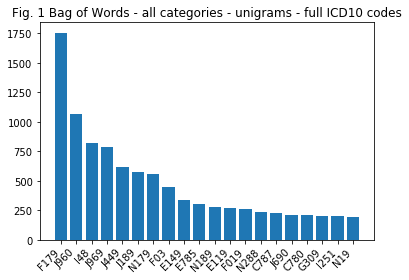

In [76]:
bow20 = bow_all.most_common(20)
bow20df=pd.DataFrame(bow20, columns=['Code', 'Count'])
plt.bar(bow20df['Code'], bow20df['Count'])
plt.title("Fig. 1 Bag of Words - all categories - unigrams - full ICD10 codes")
plt.xticks(rotation=45, ha='right')
plt.show()

**Bag of words for all records** indicates that ICD-10 code F17.9  is present in 1,754 out of the 8,171 records i.e. in approximately 21% of the death records. This is the code for "mental and behavioral disorders due to use of tobacco" and indicates that the medical certifier believed that tobacco use definitely or probably contributed to the death. 

Codes J96.0, J96.9, and J44.9 which are the 2nd, 4th, and 5th most common codes are all related to respiratory conditions including 'respiratory failure' and COPD (J44.9).  Code I48 which was the 3rd most common code indicates 'atrial fibrillation' which is most commonly caused by cardiomyopathy, chronic lung disease, coronary artery disease, and pulmonary embolism among other causes. (source: Cleveland Clinic web site https://my.clevelandclinic.org/health/diseases/16765-atrial-fibrillation-afib).  


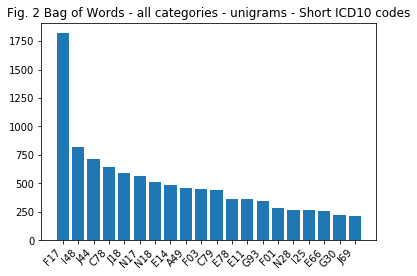

In [77]:
bow_all_short20 = bow_all_short.most_common(20)
bow_all_short20df=pd.DataFrame(bow_all_short20, columns=['Code', 'Count'])
plt.bar(bow_all_short20df['Code'], bow_all_short20df['Count'])
plt.title("Fig. 2 Bag of Words - all categories - unigrams - Short ICD10 codes")
plt.xticks(rotation=45, ha='right')
plt.show()

Bag of words for the short version (3 character) of ICD-10 code and removal of J96 codes (for respiratory failure) results in a slightly different distribution of word frquency.  F17 is still most common followed by I48 (atrial fibrillation) and J44 (pneumonia).

In [73]:
tobacco = ["F179"]

F179 = cods.clean_mc.apply(lambda x: any(c for c in tobacco if c in x))
used_tob = cods[F179]
print(round(used_tob.tobac.value_counts(normalize=True)*100,1))
print(len(used_tob))

P    52.7
Y    46.4
U     0.7
N     0.2
Name: tobac, dtype: float64
1754


Among the 1,754 records in the first bag of words the tobacco check box was either marked 'Y' (yes) or 'P' (probable) i.e. either one of those will mean that F17.9 is assigned to that record.

In [78]:
pd.crosstab(used_tob.dody, used_tob.tobac)

tobac,N,P,U,Y
dody,,,,
2016,0,234,5,191
2017,0,202,5,176
2018,2,218,2,226
2019,1,270,1,221


**Create bag of words for each garbage code category**

The following codes dominate the category-specific bags of words plots:

- J96.0 - Acute respiratory failure
- J96.9 - Respiratory failure unspecified
- J18.9 - Pneumonia
- J44.9 - Chronic obstructive pulmonary disease
- N17.9 - Acute renal failure
- F17.9 - Mental and behavioral disorders due to use of tobacco
- C78.7 - Secondary malignant neoplasm of liver and intrahepatic bile duct
- C78.0 - Secondary malignant neoplasm of lung 
- C79.5 - Secondary malignant neoplasm of bone and bone marrow
- C79.8 - Secondary malignant neoplasm of other specified sites
- I48   - Atrial fibrillation
- E78.5 - Hyperlipidemia, unspecified


** GC category: 1-Septicemia FULL ICD-10 codes**
[('J960', 381), ('J189', 303), ('N179', 289), ('F179', 237), ('J969', 215), ('I48', 195), ('A490', 149), ('A499', 125), ('F03', 115), ('N288', 112)]


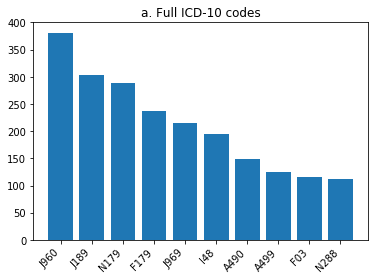

** GC category: 1-Septicemia SHORT ICD-10 codes**
[('A49', 425), ('J18', 309), ('N17', 291), ('F17', 242), ('I48', 195), ('N18', 136), ('J44', 127), ('I25', 123), ('G93', 121), ('N28', 117)]


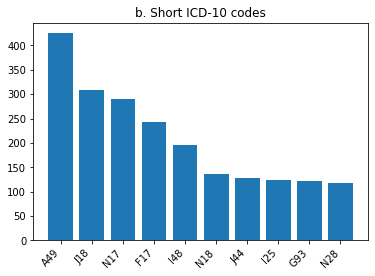

** GC category: 2-Heart failure FULL ICD-10 codes**
[('F179', 351), ('J960', 343), ('J969', 235), ('J449', 194), ('J189', 139), ('F03', 133), ('N189', 133), ('N179', 118), ('I48', 111), ('J961', 89)]


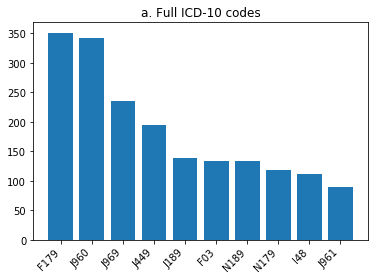

** GC category: 2-Heart failure SHORT ICD-10 codes**
[('F17', 359), ('N18', 230), ('J44', 217), ('J18', 143), ('F03', 133), ('N17', 119), ('I48', 111), ('E14', 99), ('E11', 80), ('N19', 74)]


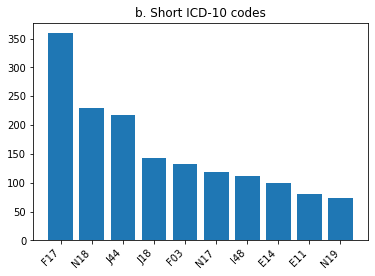

** GC category: 3-Ill-defined cancer FULL ICD-10 codes**
[('F179', 445), ('C787', 226), ('C780', 199), ('C795', 151), ('J969', 142), ('J960', 138), ('C798', 129), ('J449', 117), ('I48', 103), ('C793', 92)]


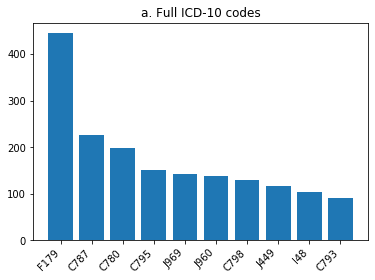

** GC category: 3-Ill-defined cancer SHORT ICD-10 codes**
[('C78', 623), ('F17', 453), ('C79', 428), ('J44', 127), ('I48', 103), ('I25', 90), ('K72', 77), ('N17', 74), ('J18', 74), ('N18', 68)]


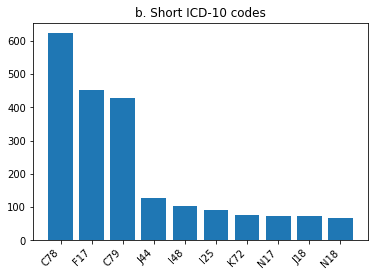

** GC category: 5-Ill-defined FULL ICD-10 codes**
[('F179', 95), ('J969', 55), ('J960', 43), ('R636', 6), ('J069', 4), ('M480', 3), ('G459', 3), ('I48', 3), ('M549', 3), ('E119', 2)]


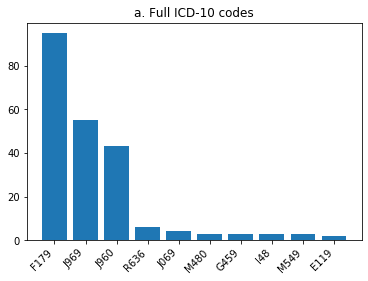

** GC category: 5-Ill-defined SHORT ICD-10 codes**
[('F17', 95), ('R63', 6), ('J06', 4), ('M48', 3), ('G45', 3), ('I48', 3), ('M54', 3), ('J39', 2), ('E11', 2), ('G81', 2)]


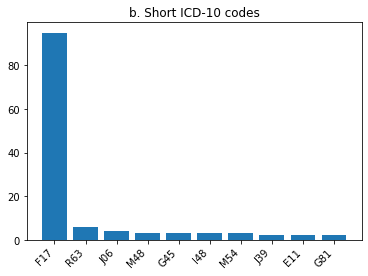

** GC category: 6-Ill-defined cardiovascular FULL ICD-10 codes**
[('F179', 626), ('I48', 411), ('E785', 230), ('J449', 224), ('F019', 206), ('E149', 176), ('J960', 158), ('F03', 151), ('J969', 143), ('G931', 110)]


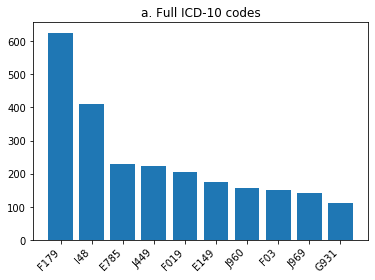

** GC category: 6-Ill-defined cardiovascular SHORT ICD-10 codes**
[('F17', 670), ('I48', 411), ('E78', 280), ('J44', 241), ('F01', 227), ('E14', 211), ('E66', 152), ('F03', 151), ('G93', 148), ('I71', 145)]


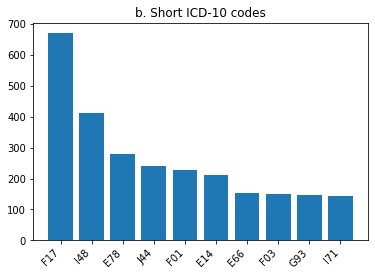

In [81]:
 for i in keep_gc_cat:
    cat_recs = cods.loc[cods['gc_cat']== i, ['clean_mc']]
    mc_list = [a for b in cat_recs['clean_mc'] for a in b]
    print('** GC category: ' + gc_label_dict.get(i) + ' FULL ICD-10 codes**')
    bow_simple = Counter(mc_list)
    bow10 = bow_simple.most_common(10)
    print(bow10)
    bow10df = pd.DataFrame(bow10, columns=['Code', 'Count'])
    plt.bar(bow10df['Code'], bow10df['Count'])
    plt.title('a. Full ICD-10 codes')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    cat_recs2 = cods.loc[cods['gc_cat']== i, ['short_mc']]
    mc_list_short = [a for b in cat_recs2['short_mc'] for a in b]
    print('** GC category: ' + gc_label_dict.get(i) + ' SHORT ICD-10 codes**')
    bow_short = Counter(mc_list_short)
    bow_short10 = bow_short.most_common(10)
    print(bow_short10)
    bow_short10df = pd.DataFrame(bow_short10, columns=['Code', 'Count'])
    plt.bar(bow_short10df['Code'], bow_short10df['Count'])
    plt.title('b. Short ICD-10 codes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [82]:

cods.to_csv('Y:/DQSS/Death/MBG/py/capstone2/data/cods_GCrecords_ICD10tokens_1619.csv')